In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

## Data Exploration

In [56]:
df = pd.read_csv('dataSetFull.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8129 entries, 0 to 8128
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8129 non-null   object 
 1   price_tnd            6421 non-null   float64
 2   price_eur            6421 non-null   float64
 3   location             8129 non-null   object 
 4   city                 6813 non-null   object 
 5   governorate          8129 non-null   object 
 6   Area                 7944 non-null   float64
 7   pieces               6940 non-null   float64
 8   room                 7720 non-null   float64
 9   bathroom             7470 non-null   float64
 10  age                  3984 non-null   object 
 11  state                7029 non-null   float64
 12  latt                 8094 non-null   float64
 13  long                 8094 non-null   float64
 14  distance_to_capital  8094 non-null   float64
 15  garage               8129 non-null   i

In [58]:
df.describe()

,price_tnd,price_eur,Area,pieces,room,bathroom,state,latt,long,distance_to_capital,...,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
count,6.421000e+03,6.421000e+03,7944.000000,6940.000000,7720.000000,7470.000000,7029.000000,8094.000000,8094.000000,8094.000000,...,8129.0,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000,8129.000000
mean,6.812867e+05,2.112588e+05,369.742951,4.318300,3.325389,1.997724,1.386826,36.421537,10.396046,65.495742,...,0.0,0.245295,0.104072,0.082544,0.231886,0.262271,0.048099,0.568582,0.558248,0.550129
std,8.825321e+05,2.737262e+05,955.113560,2.270759,2.020898,1.237548,0.574206,1.144072,0.409603,126.346464,...,0.0,0.430288,0.305373,0.275209,0.422062,0.439896,0.213989,0.495305,0.496626,0.497511
min,6.500000e+03,2.015000e+03,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-0.428052,0.003560,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.600000e+05,8.060000e+04,117.000000,3.000000,2.000000,1.000000,1.000000,36.401080,10.195560,11.345082,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+05,1.302000e+05,178.000000,4.000000,3.000000,2.000000,1.000000,36.818810,10.325278,17.722190,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,7.800000e+05,2.418000e+05,371.000000,5.000000,4.000000,2.000000,2.000000,36.876389,10.614570,72.825068,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.900000e+07,5.890000e+06,22000.000000,27.000000,50.000000,20.000000,2.000000,40.565098,11.331493,4224.947771,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df.head()

,id,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,...,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
0,b9e1c759-d149-46e8-9765-d8c198a13ff0,NaN,NaN,Cité El Bassatine Ancien,Boumhel Bassatine,Ben Arous,NaN,27.0,8.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,863e62e5-0bfe-49f3-ad97-e0ae91be68e9,3250000.0,1007500.0,El Kantaoui,Hammam Sousse,Sousse,1000.0,26.0,16.0,14.0,...,0,1,1,0,0,1,1,1,1,1
2,0048e6da-9aec-4ebe-8ee1-1ad7cd0015e6,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,...,0,0,0,0,0,0,1,1,1,1
3,032f818f-1b38-4d1a-a000-753e235ccf54,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,NaN,...,0,0,0,0,0,0,1,1,1,1
4,2272576f-fb3b-4c82-8a0e-a00fe2e7c154,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,...,0,0,0,0,0,0,1,1,1,1


In [60]:
df.isna().sum()

id                        0
price_tnd              1708
price_eur              1708
location                  0
city                   1316
governorate               0
Area                    185
pieces                 1189
room                    409
bathroom                659
age                    4145
state                  1100
latt                     35
long                     35
distance_to_capital      35
garage                    0
garden                    0
concierge                 0
beach_view                0
mountain_view             0
pool                      0
elevator                  0
furnished                 0
equipped_kitchen          0
central_heating           0
air_conditioning          0
dtype: int64

**Data Cleaning**

In [61]:
# drop price_eur column
df = df.drop(['price_eur'], axis=1)

In [62]:
# change price_tnd to price
df.rename(columns = {'price_tnd':'price'}, inplace = True)

In [63]:
# drop missing value
df = df.dropna(subset=['city', 'Area', 'pieces', 'state', 'latt', 'long','distance_to_capital'])

In [64]:
# Fill missing price
mean_prices = df.groupby('location')['price'].mean()

# fill in the missing values using the mean price for each location
def fill_missing_price(row, mean_prices):
    if pd.isna(row['price']):
        return mean_prices[row['location']]
    else:
        return row['price']

df['price'] = df.apply(fill_missing_price, args=(mean_prices,), axis=1)

df['price'] = df['price'].round(2)

# few price still missing 
df['price'] = df['price'].dropna()

In [65]:
# Fill missing room and bathroom
def find_mean(df, column):
    mean = df.groupby('Area')[column].mean()

    def fill_missing(row, mean):
        if pd.isna(row[column]):
            return mean.get(row['Area'])
        else:
            return row[column]

    df[column] = df.apply(fill_missing, args=(mean,), axis=1)

find_mean(df, 'room')
find_mean(df, 'bathroom')

In [66]:
# Fill missing age with 0 assuming that they are newly add to the dataset
df['age'] = df['age'].fillna('0')

In [67]:
df.isna().sum()

id                      0
price                  60
location                0
city                    0
governorate             0
Area                    0
pieces                  0
room                    0
bathroom                0
age                     0
state                   0
latt                    0
long                    0
distance_to_capital     0
garage                  0
garden                  0
concierge               0
beach_view              0
mountain_view           0
pool                    0
elevator                0
furnished               0
equipped_kitchen        0
central_heating         0
air_conditioning        0
dtype: int64

In [68]:
# Calculate the overall mean price
overall_mean_price = df['price'].mean()

# Fill missing values in 'price' with the overall mean price
df['price'] = df['price'].fillna(overall_mean_price)

# Round the price to 2 decimal places
df['price'] = df['price'].round(2)

In [69]:
df.shape

(5532, 25)

In [72]:
data = df.copy()
data.to_csv('Dataset_Group04.csv', index = False)
data

,id,price,location,city,governorate,Area,pieces,room,bathroom,age,...,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
1,863e62e5-0bfe-49f3-ad97-e0ae91be68e9,3250000.00,El Kantaoui,Hammam Sousse,Sousse,1000.0,26.0,16.0,14.0,30-50,...,0,1,1,0,0,1,1,1,1,1
2,0048e6da-9aec-4ebe-8ee1-1ad7cd0015e6,2000000.00,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,0,...,0,0,0,0,0,0,1,1,1,1
4,2272576f-fb3b-4c82-8a0e-a00fe2e7c154,2000000.00,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,0,...,0,0,0,0,0,0,1,1,1,1
5,67e06050-57c0-4665-8a2e-a9010b578e4a,1000000.00,Sousse Riadh,Sousse Riadh,Sousse,1000.0,23.0,16.0,9.0,1-5,...,0,0,0,0,0,0,0,0,0,0
6,0a649ac8-6916-48b6-969a-2f64f93aa2e1,1292136.36,Sidi El Mahrsi,Nabeul,Nabeul,3600.0,21.0,20.0,20.0,0,...,0,0,1,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,1af90a51-90ba-47ba-a26d-f67770a6ac0d,110000.00,Hammamet Nord,Hammamet,Nabeul,32.0,1.0,1.0,1.0,1-5,...,0,1,0,0,0,0,0,0,1,0
6923,12a54973-0d42-4448-b80c-3d0d12b32224,107000.00,El Kantaoui,Hammam Sousse,Sousse,32.0,1.0,1.0,1.0,10-20,...,0,0,0,0,0,0,0,0,0,0
6924,1311fc04-458c-4534-8c59-9247ab4116e9,98000.00,Cité Ennasr 1,Ariana Ville,Ariana,30.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
6925,161dceee-b790-4db9-8add-7435a2eee534,253586.13,Cité Ennkhilet,Raoued,Ariana,30.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0


In [73]:
data = pd.read_csv('Dataset_Group04.csv')
data.dtypes

id                      object
price                  float64
location                object
city                    object
governorate             object
Area                   float64
pieces                 float64
room                   float64
bathroom               float64
age                     object
state                  float64
latt                   float64
long                   float64
distance_to_capital    float64
garage                   int64
garden                   int64
concierge                int64
beach_view               int64
mountain_view            int64
pool                     int64
elevator                 int64
furnished                int64
equipped_kitchen         int64
central_heating          int64
air_conditioning         int64
dtype: object

In [74]:
data.dropna(subset=['price'], inplace=True)

# Normalize numerical features
float_columns = df.select_dtypes(include='float64').columns
float_columns = float_columns.drop('state', errors='ignore')
median_values = df[float_columns].median()
df[float_columns] = df[float_columns].fillna(median_values)
df.dropna(subset=['state'], inplace=True)


In [75]:
scaler = MinMaxScaler()
numerical_features = ['Area', 'room', 'bathroom', 'distance_to_capital']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [76]:
le = LabelEncoder()
data['location'] = le.fit_transform(data['location'])
data['city'] = le.fit_transform(data['city'])
data['governorate'] = le.fit_transform(data['governorate'])

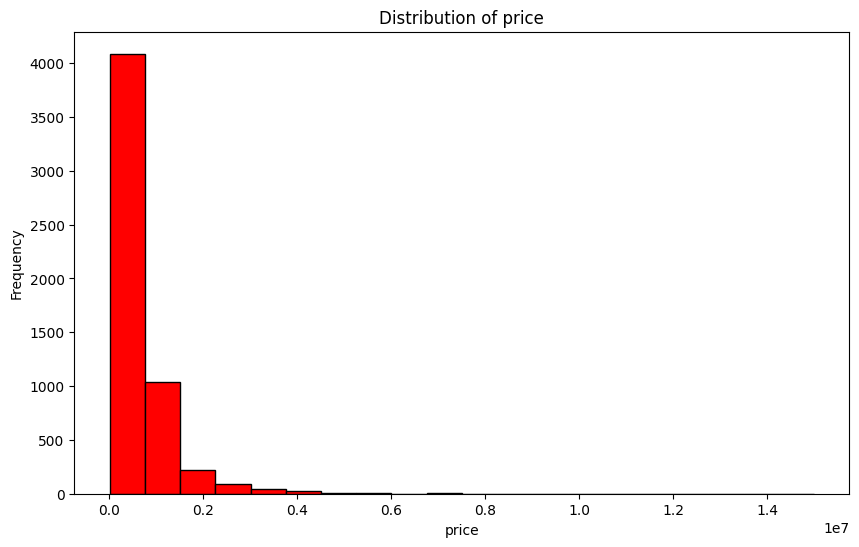

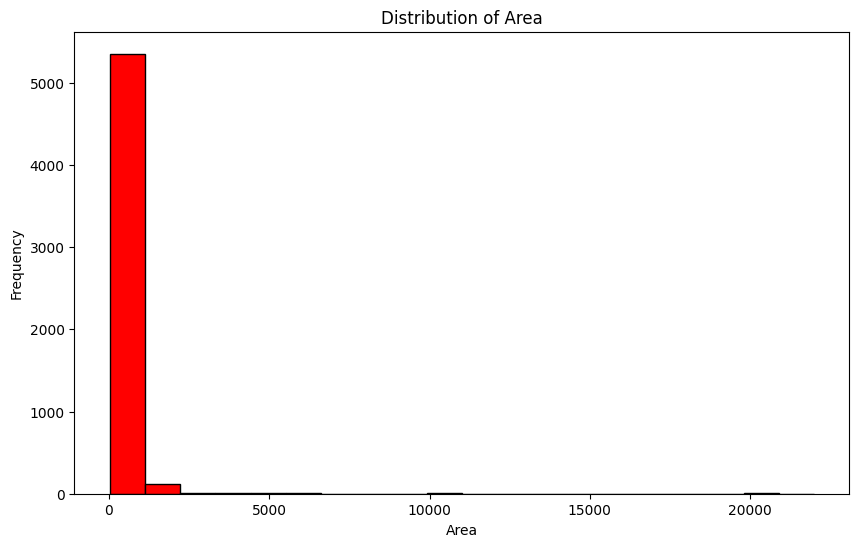

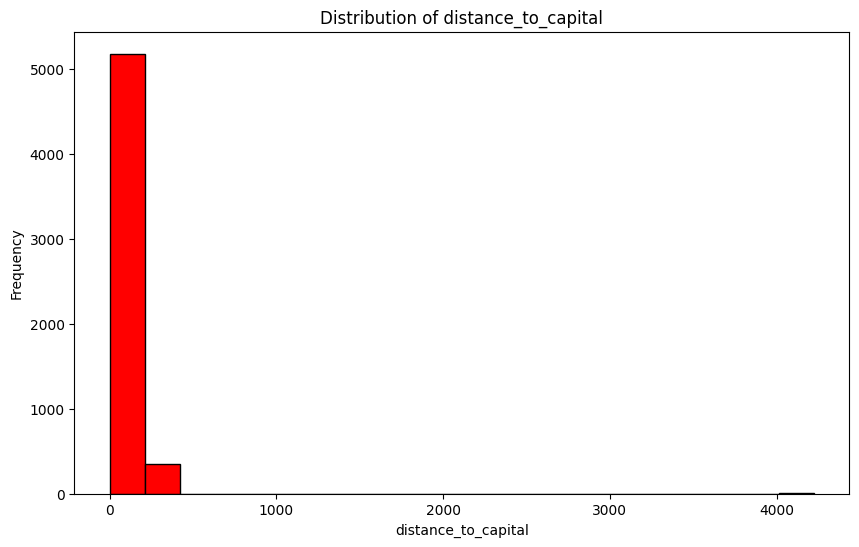

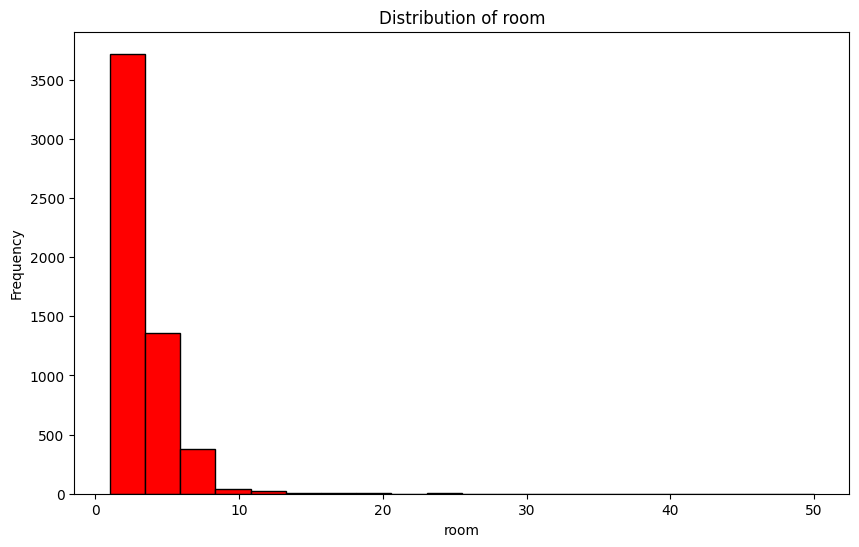

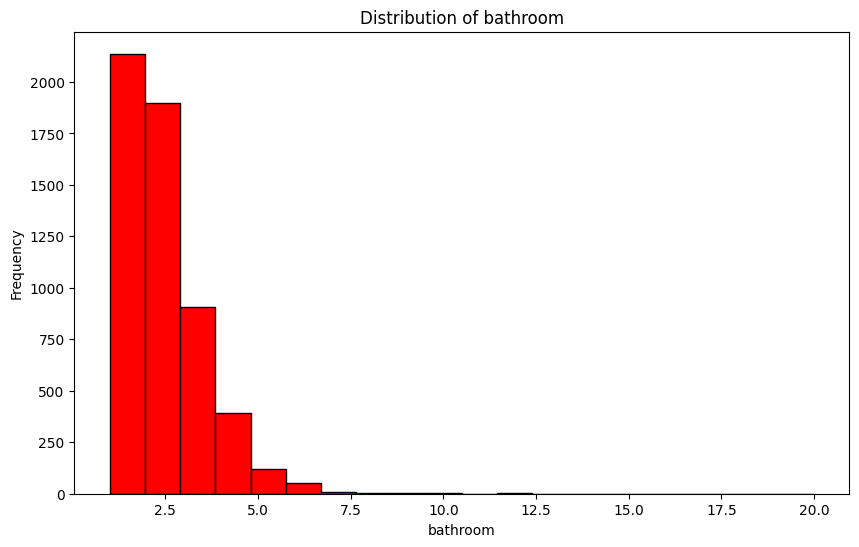

In [77]:
#Plot histograms for numerical columns
numerical_columns = ['price', 'Area', 'distance_to_capital', 'room', 'bathroom']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins = 20, color = 'red', edgecolor = 'black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

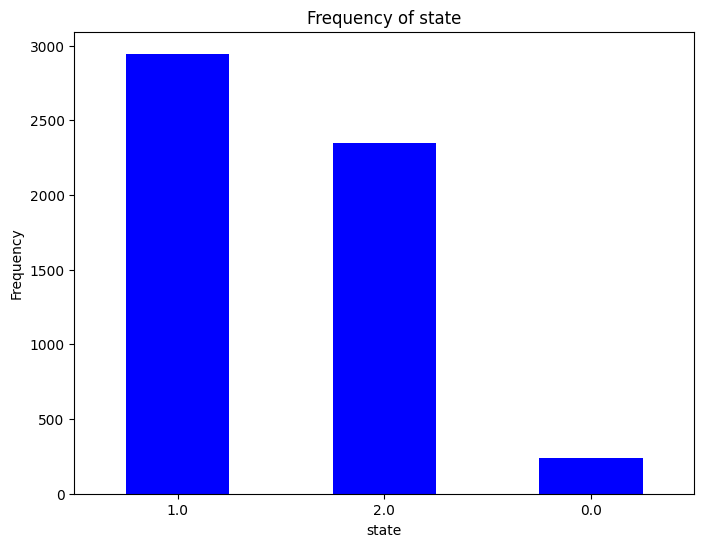

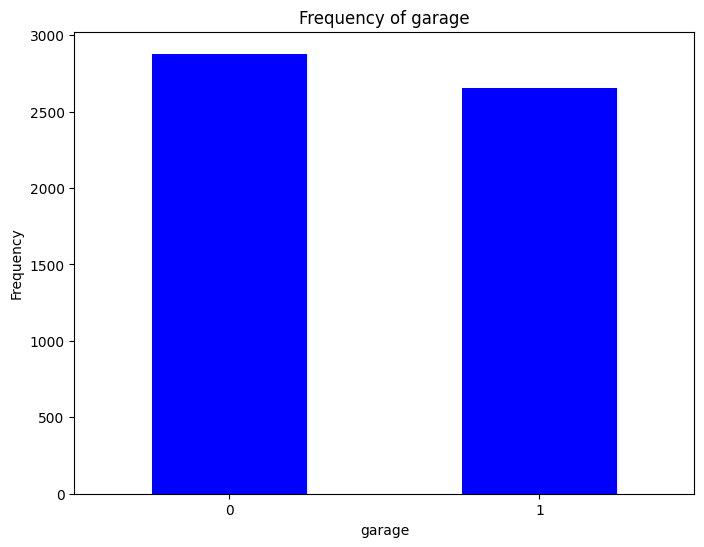

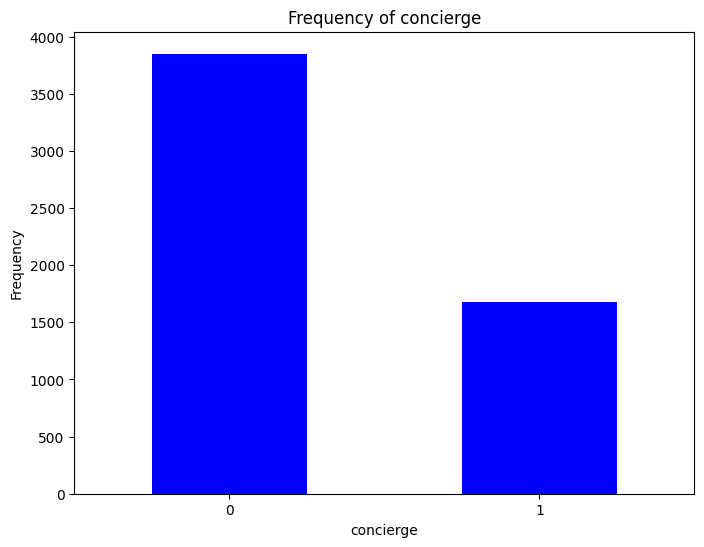

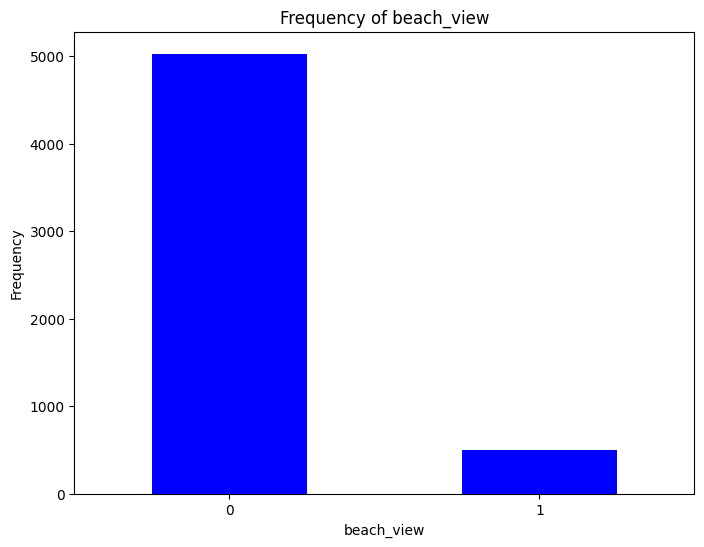

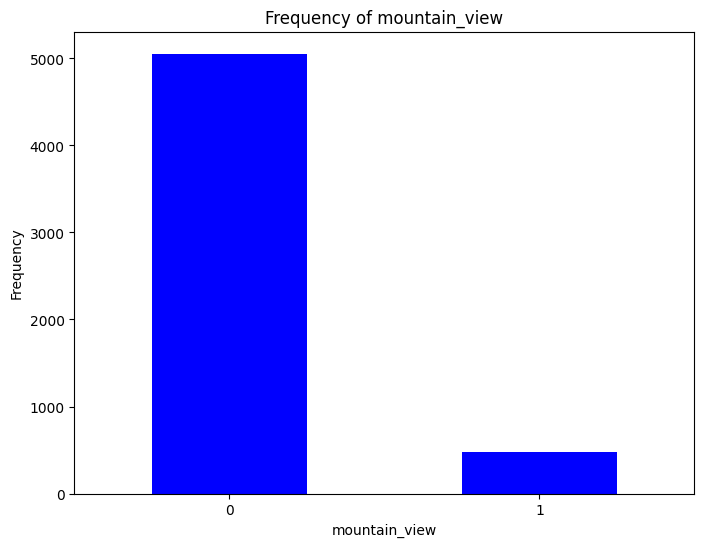

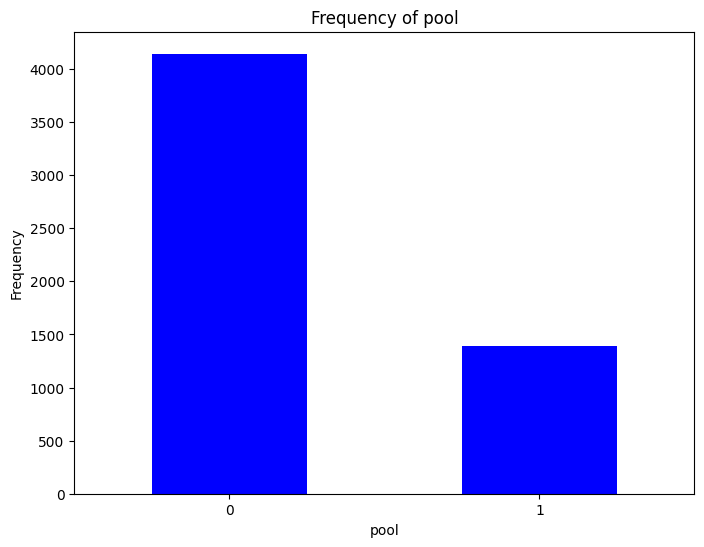

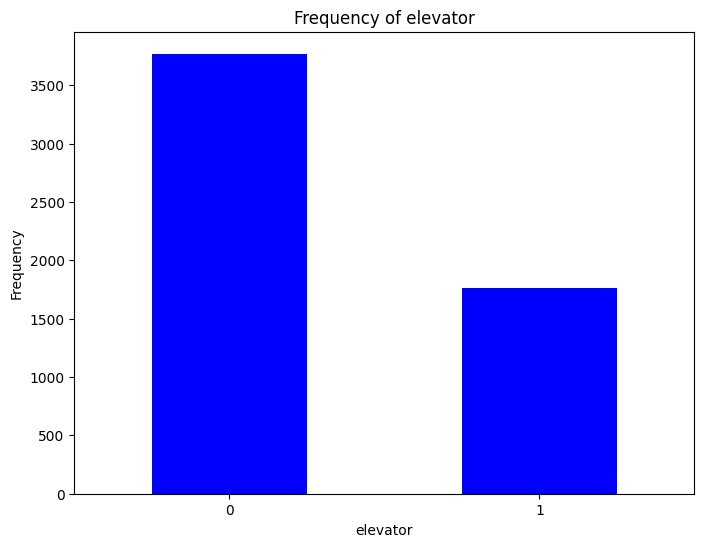

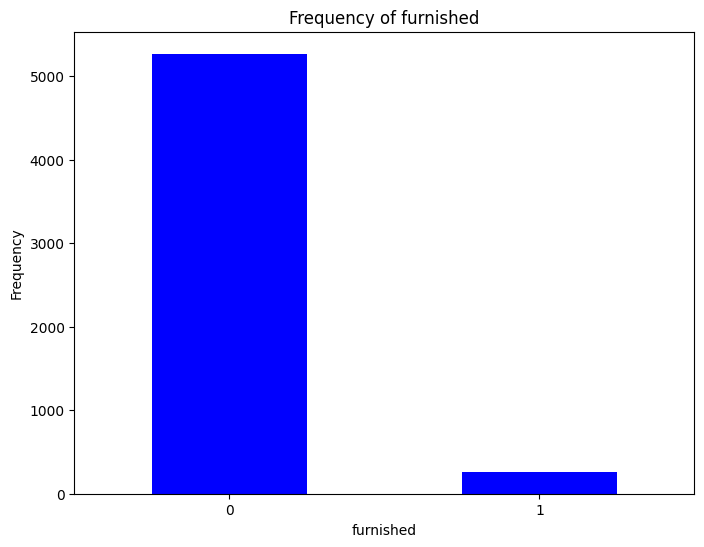

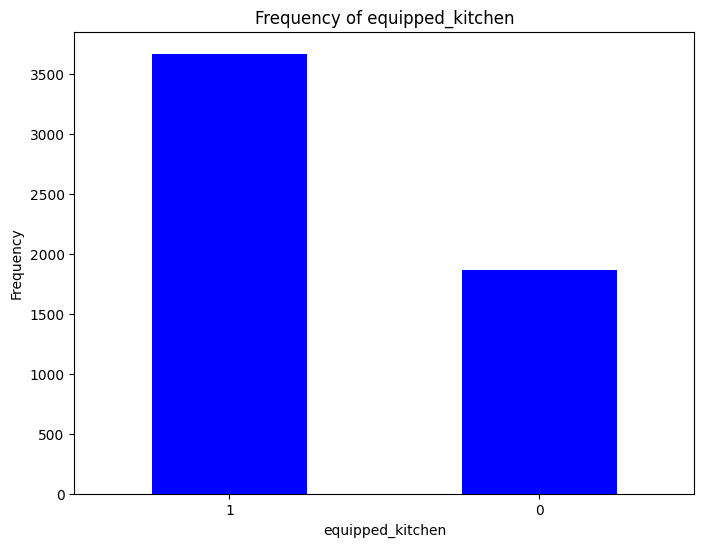

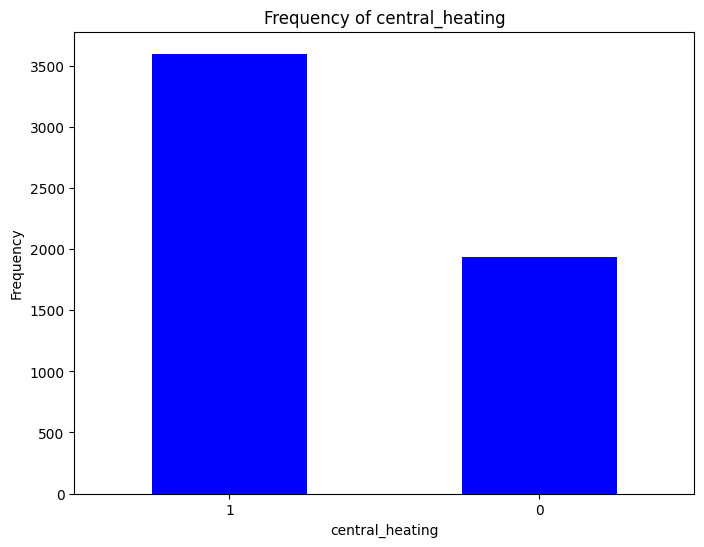

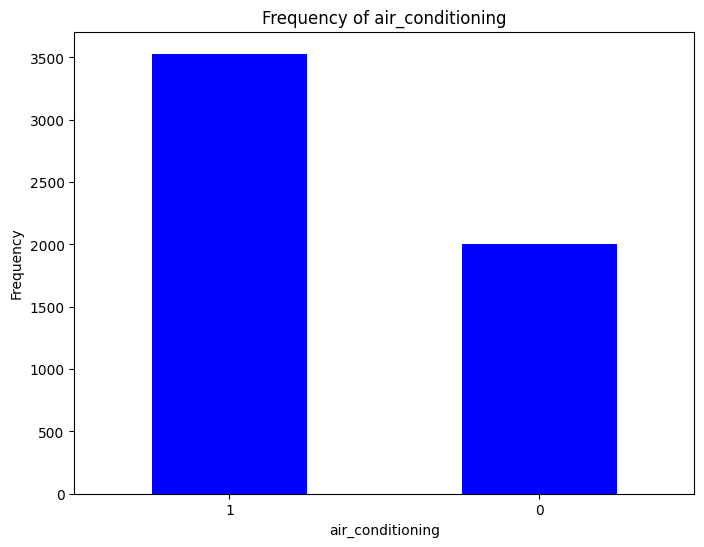

In [78]:
#Plot bar plots for categorical columns
categorical_columns = ['state', 'garage', 'concierge', 'beach_view', 'mountain_view', 'pool', 'elevator', 'furnished', 'equipped_kitchen', 'central_heating', 'air_conditioning']
for col in categorical_columns:
    plt.figure(figsize = (8, 6))
    category_counts = df[col].value_counts()
    category_counts.plot(kind = 'bar', color = 'blue')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation = 0)
    plt.show()

In [79]:
data = data.drop(['age', 'latt', 'long','garden'], axis=1)
data.head()

,id,price,location,city,governorate,Area,pieces,room,bathroom,state,...,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
0,863e62e5-0bfe-49f3-ad97-e0ae91be68e9,3250000.00,166,29,0,0.044586,26.0,0.306122,0.684211,1.0,...,1,1,1,0,0,1,1,1,1,1
1,0048e6da-9aec-4ebe-8ee1-1ad7cd0015e6,2000000.00,310,65,0,0.041492,24.0,0.469388,0.473684,1.0,...,0,0,0,0,0,0,1,1,1,1
2,2272576f-fb3b-4c82-8a0e-a00fe2e7c154,2000000.00,310,65,0,0.041492,24.0,0.469388,0.473684,1.0,...,0,0,0,0,0,0,1,1,1,1
3,67e06050-57c0-4665-8a2e-a9010b578e4a,1000000.00,314,64,0,0.044586,23.0,0.306122,0.421053,2.0,...,1,0,0,0,0,0,0,0,0,0
4,0a649ac8-6916-48b6-969a-2f64f93aa2e1,1292136.36,300,51,13,0.162875,21.0,0.387755,1.000000,2.0,...,1,0,1,0,1,0,0,1,1,1


In [80]:
# Train-test split
data.train = data.select_dtypes(['float64','int64']).drop(['price'], axis=1)
X = data.train
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)


C:\Users\ling1\AppData\Local\Temp\ipykernel_23644\1948021263.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.train = data.select_dtypes(['float64','int64']).drop(['price'], axis=1)


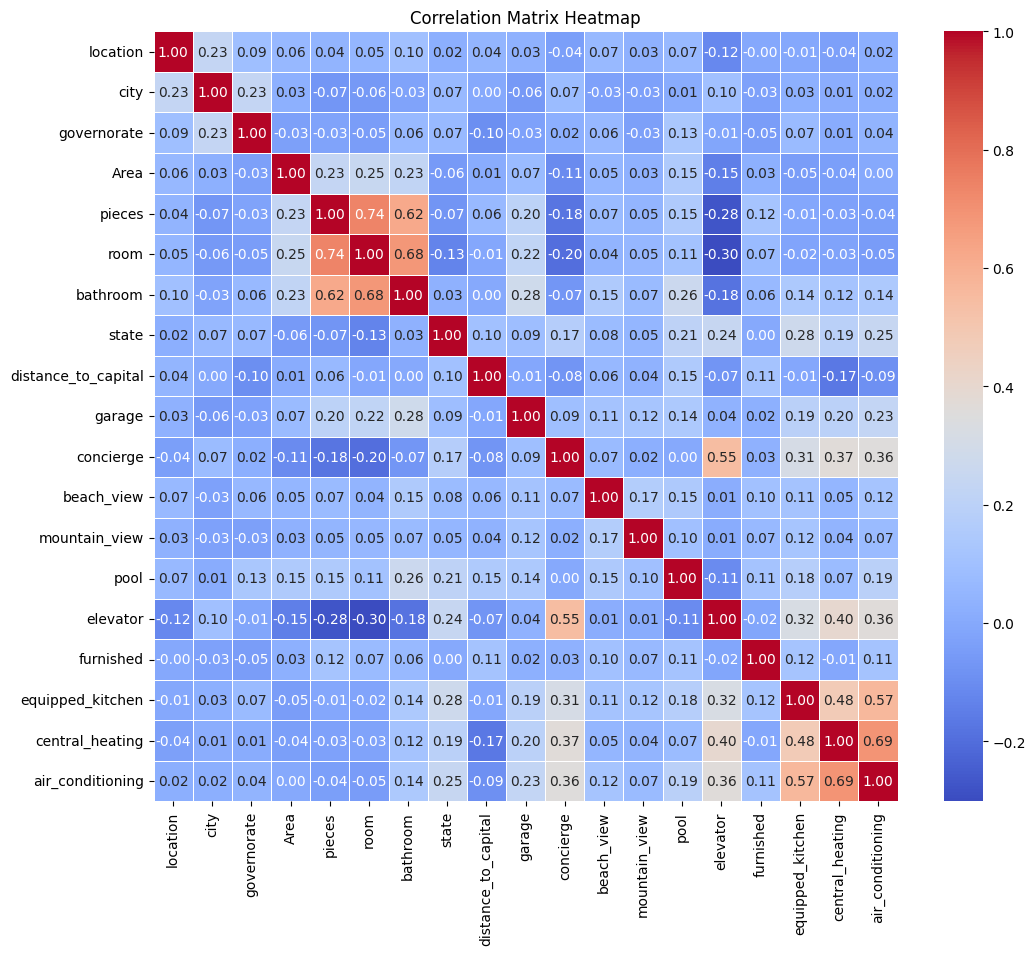

In [81]:
# Create heatmap of correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Decision Tree Regressor

In [82]:
# Define and fit Decision Tree Regressor
param_grid = {
    'max_depth': 4,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

regressor = DecisionTreeRegressor(random_state=42, **param_grid)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [83]:
# Evaluate Decision Tree on validation set
y_val_pred = regressor.predict(X_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f'Decision Tree Mean Absolute Error on Validation Set: {mae_val:.2f}')
print(f'Decision Tree R-squared on Validation Set: {r2_val:.2f}')

Decision Tree Mean Absolute Error on Validation Set: 277655.47
Decision Tree R-squared on Validation Set: 0.12


In [84]:
# Evaluate Decision Tree on test set
y_pred = regressor.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f'Decision Tree Mean Absolute Error on Test Set: {mae_test:.2f}')
print(f'Decision Tree R-squared on Test Set: {r2_test:.2f}')

Decision Tree Mean Absolute Error on Test Set: 285671.18
Decision Tree R-squared on Test Set: 0.28


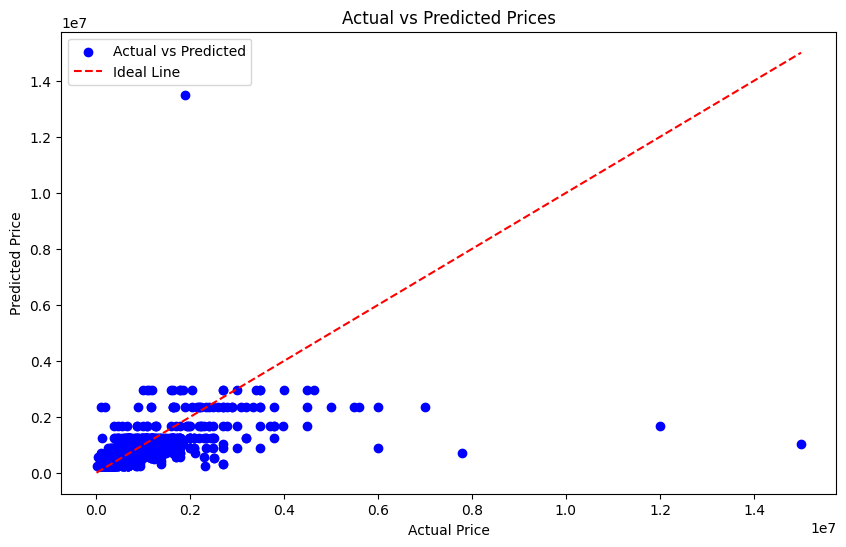

In [85]:
# Create scatter plot for actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

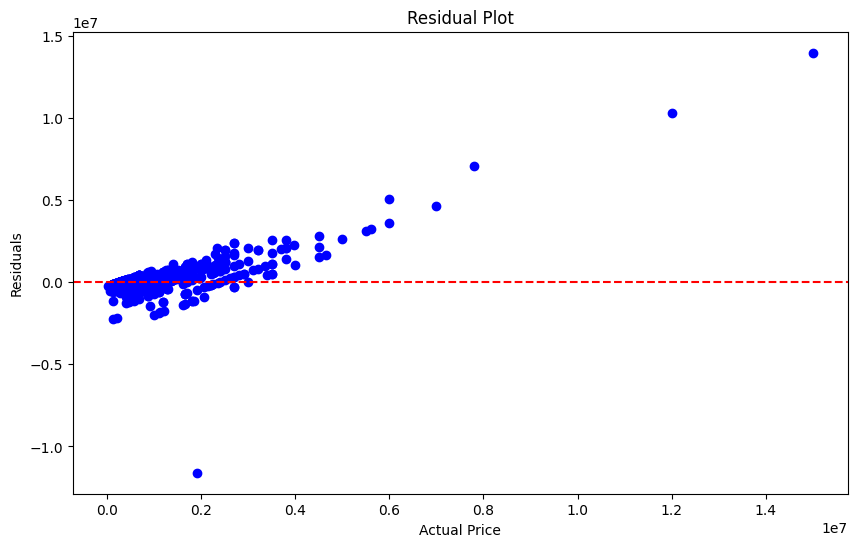

In [86]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.show()

In [87]:
# Feature Importance for Decision Tree
feature_importances = regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
3,Area,0.468971
4,pieces,0.178871
2,governorate,0.175972
11,beach_view,0.113218
6,bathroom,0.038695
17,central_heating,0.015197
0,location,0.009074
1,city,0.000000
8,distance_to_capital,0.000000
7,state,0.000000


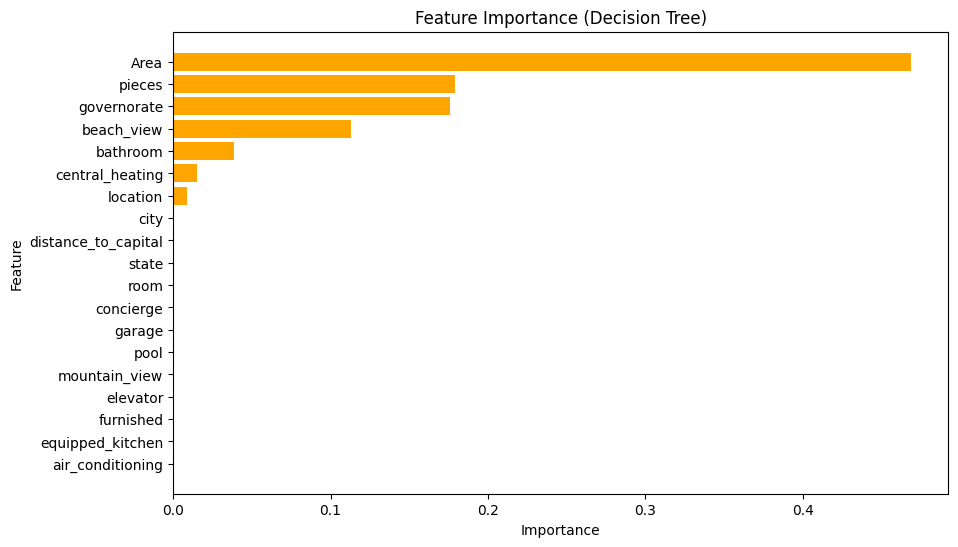

In [88]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='orange')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Decision Tree)')
plt.gca().invert_yaxis()
plt.show()

## Linear Regression Model

In [89]:
# Train Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [90]:
# Evaluate Linear Regression on validation set
y_val_pred_lr = model_lr.predict(X_val)
mae_val_lr = mean_absolute_error(y_val, y_val_pred_lr)
r2_val_lr = r2_score(y_val, y_val_pred_lr)

print(f'Linear Regression Mean Absolute Error on Validation Set: {mae_val_lr:.2f}')
print(f'Linear Regression R-squared on Validation Set: {r2_val_lr:.2f}')

Linear Regression Mean Absolute Error on Validation Set: 322116.59
Linear Regression R-squared on Validation Set: 0.27


In [91]:
# Evaluate Linear Regression on test set
y_pred_lr = model_lr.predict(X_test)
mae_test_lr = mean_absolute_error(y_test, y_pred_lr)
r2_test_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Mean Absolute Error on Test Set: {mae_test_lr:.2f}')
print(f'Linear Regression R-squared on Test Set: {r2_test_lr:.2f}')

Linear Regression Mean Absolute Error on Test Set: 341572.31
Linear Regression R-squared on Test Set: 0.28


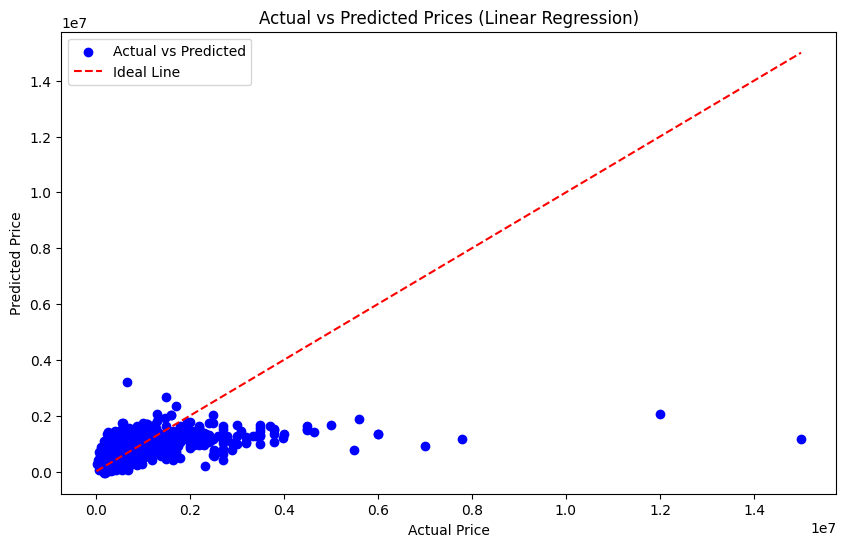

In [92]:
# Create scatter plot for actual vs predicted prices (Linear Regression)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


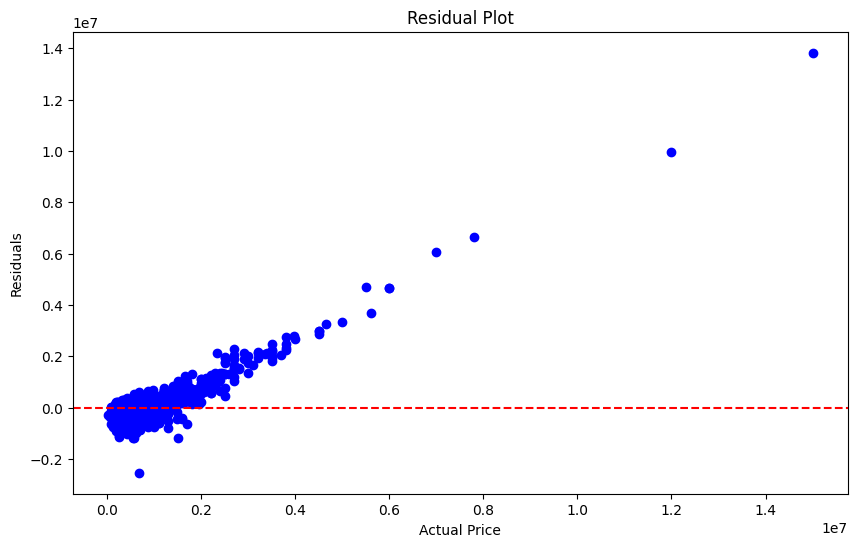

In [93]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.show()

In [94]:
coefficients = model_lr.coef_
feature_importance_df_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance_df_lr['Absolute Coefficient'] = np.abs(feature_importance_df_lr['Coefficient'])
feature_importance_df_lr = feature_importance_df_lr.sort_values(by='Absolute Coefficient', ascending=False)
feature_importance_df_lr

,Feature,Coefficient,Absolute Coefficient
5,room,3.597700e+06,3.597700e+06
6,bathroom,2.364448e+06,2.364448e+06
3,Area,1.808863e+06,1.808863e+06
8,distance_to_capital,-1.549470e+06,1.549470e+06
13,pool,2.358856e+05,2.358856e+05
11,beach_view,1.990902e+05,1.990902e+05
7,state,-1.468807e+05,1.468807e+05
17,central_heating,1.384956e+05,1.384956e+05
9,garage,1.076898e+05,1.076898e+05
14,elevator,-8.835750e+04,8.835750e+04


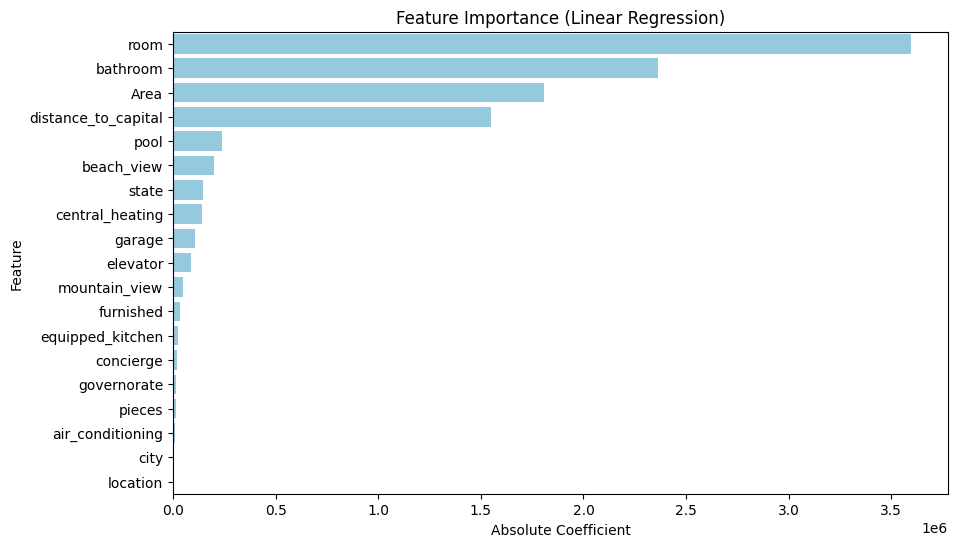

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance_df_lr, color='skyblue', orient='h')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression)')
plt.show()

## Random Forest Regressor

In [96]:
# Train Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [97]:
# Evaluate Random Forest on validation set
y_val_pred_rf = model_rf.predict(X_val)
mae_val_rf = mean_absolute_error(y_val, y_val_pred_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf)

print(f'Random Forest Mean Absolute Error on Validation Set: {mae_val_rf:.2f}')
print(f'Random Forest R-squared on Validation Set: {r2_val_rf:.2f}')

Random Forest Mean Absolute Error on Validation Set: 234800.97
Random Forest R-squared on Validation Set: 0.56


In [98]:
# Evaluate Random Forest on test set
y_pred_rf = model_rf.predict(X_test)
mae_test_rf = mean_absolute_error(y_test, y_pred_rf)
r2_test_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Absolute Error on Test Set: {mae_test_rf:.2f}')
print(f'Random Forest R-squared on Test Set: {r2_test_rf:.2f}')

Random Forest Mean Absolute Error on Test Set: 253305.62
Random Forest R-squared on Test Set: 0.45


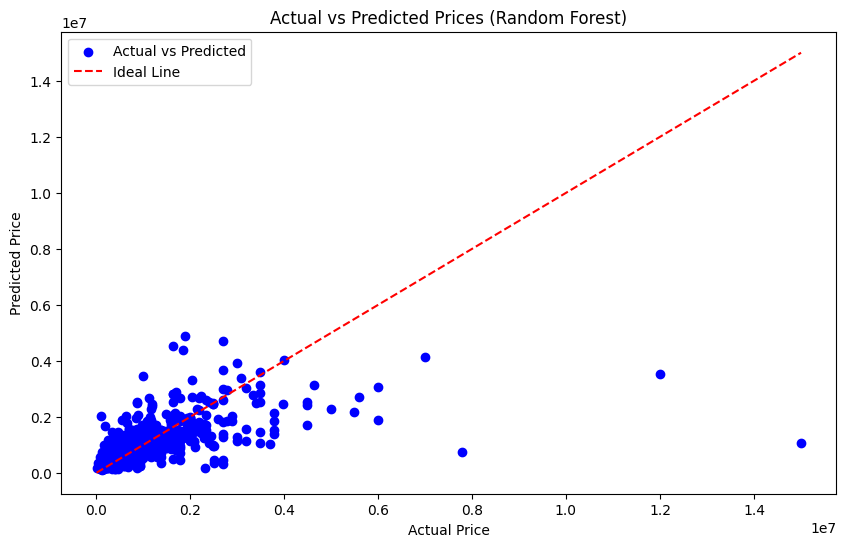

In [99]:
# Create scatter plot for actual vs predicted prices (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

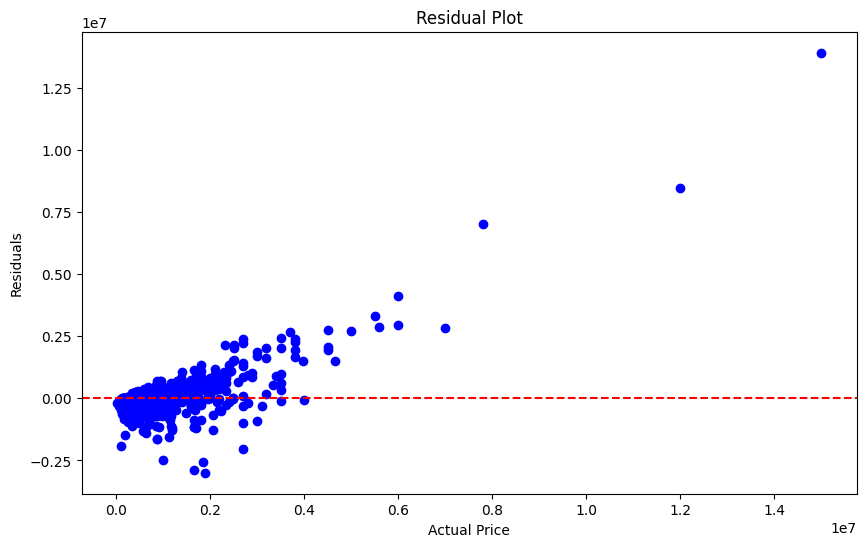

In [100]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.show()

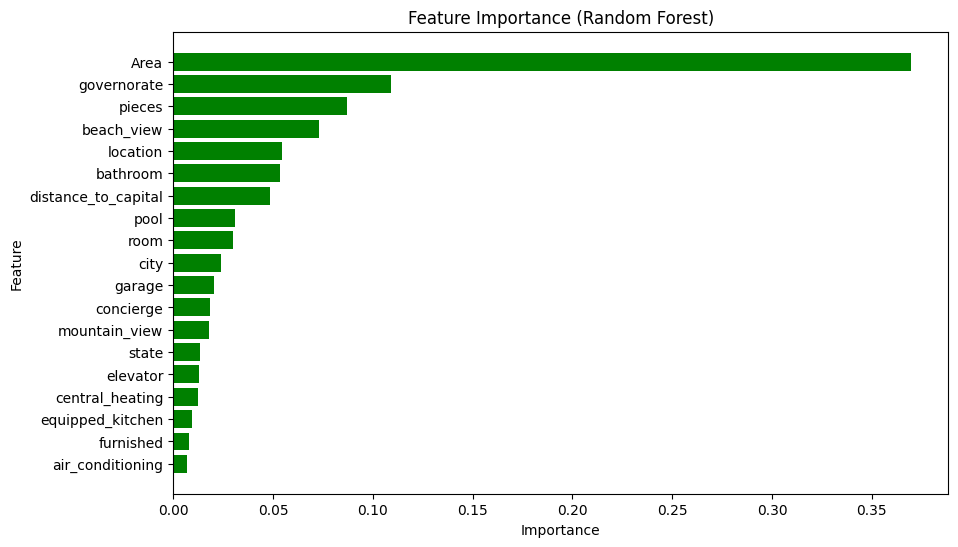

In [101]:
# Feature Importance for Random Forest
feature_importances_rf = model_rf.feature_importances_
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

## XGBoost Regressor

In [102]:
# Train XGBoost Regressor
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', 
                             colsample_bytree = 0.3, 
                             learning_rate = 0.1,
                             max_depth = 5, 
                             alpha = 10, 
                             n_estimators = 10)

model_xgb.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [103]:
# Evaluate XGBoost on validation set
y_val_pred_xgb = model_xgb.predict(X_val)
mae_val_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
r2_val_xgb = r2_score(y_val, y_val_pred_xgb)

print(f'XGBoost Mean Absolute Error on Validation Set: {mae_val_xgb:.2f}')
print(f'XGBoost R-squared on Validation Set: {r2_val_xgb:.2f}')


XGBoost Mean Absolute Error on Validation Set: 310900.10
XGBoost R-squared on Validation Set: 0.31


In [104]:
# Evaluate XGBoost on test set
y_pred_xgb = model_xgb.predict(X_test)
mae_test_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_test_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Absolute Error on Test Set: {mae_test_xgb:.2f}')
print(f'XGBoost R-squared on Test Set: {r2_test_xgb:.2f}')

XGBoost Mean Absolute Error on Test Set: 330974.22
XGBoost R-squared on Test Set: 0.26


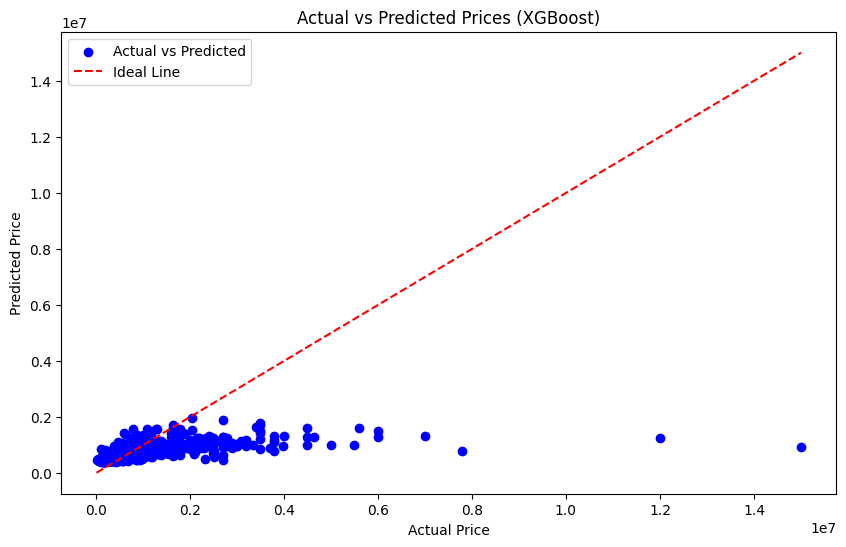

In [105]:
# Create scatter plot for actual vs predicted prices (XGBoost)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted Prices (XGBoost)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

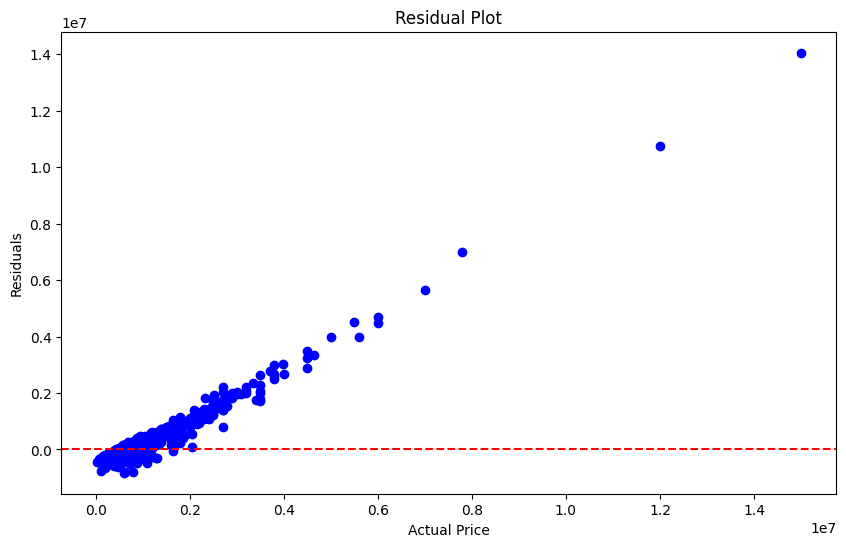

In [106]:
residuals = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.show()

In [107]:
# Feature Importance for XGBoost
feature_importances_xgb = model_xgb.feature_importances_
feature_importance_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_xgb})
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)
feature_importance_df_xgb

,Feature,Importance
6,bathroom,0.301956
3,Area,0.115229
9,garage,0.108571
13,pool,0.083766
11,beach_view,0.064861
1,city,0.052650
4,pieces,0.050040
8,distance_to_capital,0.039064
10,concierge,0.038171
5,room,0.035923


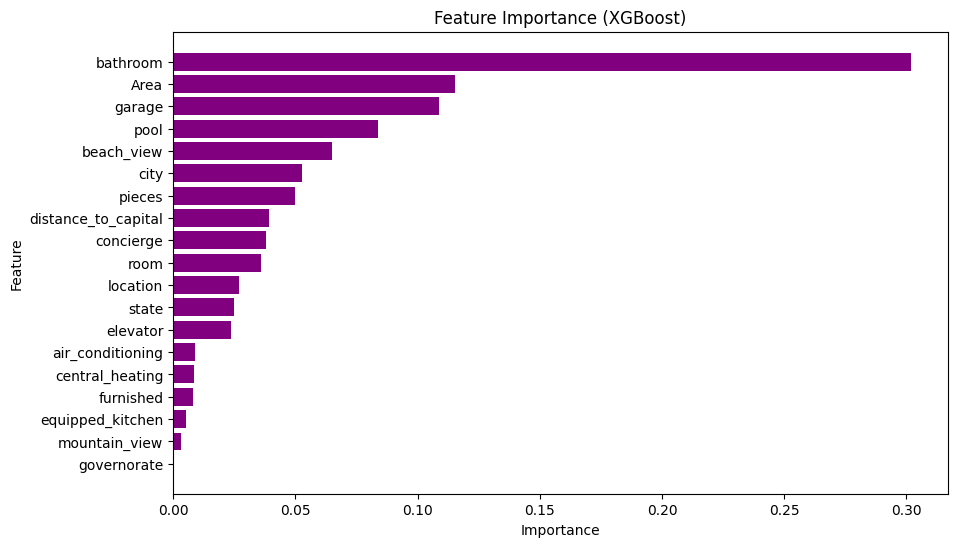

In [108]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_xgb['Feature'], feature_importance_df_xgb['Importance'], color='purple')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis()
plt.show()

In [109]:
def evaluate_model_performance(model, X_val, y_val, X_test, y_test):
    # Evaluate model on validation set
    y_val_pred = model.predict(X_val)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)
    
    # Evaluate model on test set
    y_test_pred = model.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Print evaluation results
    print(f'Validation Set:')
    print(f'Mean Absolute Error: {mae_val:.2f}')
    print(f'R-squared: {r2_val:.2f}')
    print(f'\nTest Set:')
    print(f'Mean Absolute Error: {mae_test:.2f}')
    print(f'R-squared: {r2_test:.2f}')

# Evaluate Decision Tree Regression
print("Decision Tree Performance:")
evaluate_model_performance(regressor, X_val, y_val, X_test, y_test)
print("\n")

# Evaluate Linear Regression
print("Linear Regression Performance:")
evaluate_model_performance(model_lr, X_val, y_val, X_test, y_test)
print("\n")

# Evaluate Random Forest
print("Random Forest Performance:")
evaluate_model_performance(model_rf, X_val, y_val, X_test, y_test)
print("\n")

# Evaluate XGBoost
print("XGBoost Performance:")
evaluate_model_performance(model_xgb, X_val, y_val, X_test, y_test)


Decision Tree Performance:
Validation Set:
Mean Absolute Error: 277655.47
R-squared: 0.12

Test Set:
Mean Absolute Error: 285671.18
R-squared: 0.28


Linear Regression Performance:
Validation Set:
Mean Absolute Error: 322116.59
R-squared: 0.27

Test Set:
Mean Absolute Error: 341572.31
R-squared: 0.28


Random Forest Performance:
Validation Set:
Mean Absolute Error: 234800.97
R-squared: 0.56

Test Set:
Mean Absolute Error: 253305.62
R-squared: 0.45


XGBoost Performance:
Validation Set:
Mean Absolute Error: 310900.10
R-squared: 0.31

Test Set:
Mean Absolute Error: 330974.22
R-squared: 0.26


In [110]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Decision Tree Predicted Price' : y_pred,
    'Linear Regression Predicted Price': y_pred_lr,
    'Random Forest Predicted Price': y_pred_rf,
    'XGBoost Predicted Price': y_pred_xgb
})

# Round the predicted prices for cleaner presentation
results_df = results_df.round(2)

# Print the DataFrame
display(results_df.head(10))

,Actual Price,Decision Tree Predicted Price,Linear Regression Predicted Price,Random Forest Predicted Price,XGBoost Predicted Price
3375,200000.00,267346.93,355716.05,261499.88,493103.4375
4852,580308.86,354805.47,384479.32,383429.98,501592.8125
1820,360000.00,444432.92,665457.02,427140.07,582636.0625
5366,295000.00,444432.92,370301.36,363307.83,500309.3125
1720,450000.00,573711.23,413518.02,426916.67,580304.1250
994,466419.78,573711.23,801503.77,549079.79,715263.8125
4129,375000.00,354805.47,309940.23,383710.44,532105.1875
3975,425000.00,538555.36,663153.62,337619.24,578283.3750
3197,1400000.00,313476.13,561438.27,350380.19,673420.6250
865,1050000.00,1261180.80,1197548.03,1020297.06,834918.5625
